In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          365 non-null    object 
 1   Temperature  365 non-null    float64
 2   Rainfall     365 non-null    float64
 3   Flyers       365 non-null    int64  
 4   Price        365 non-null    float64
 5   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 20.0+ KB


1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.


In [7]:
def get_lower_and_upper_bounds(series, multiplier = 1.5):
    '''
    This function takes in a series and a multiplier (default is 1.5)
    Returns the upper and lower bounds 
    '''
    # get first quarter and 3rd quarter
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    
    # calculate iqr
    iqr = q3 - q1

    # Define the inner lower and upper fences using the multiplier
    inner_lower_fence = q1 - (multiplier * iqr)
    inner_upper_fence = q3 + (multiplier * iqr)
    
    # Return the lower and upper fences
    return inner_lower_fence, inner_upper_fence

1.a. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [8]:
ilr, iur = get_lower_and_upper_bounds(df['Flyers'])
outliers = df[df['Flyers'] < ilr]

In [9]:
outliers

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20


In [10]:
def see_outlier_columns(df, series, upper_bound = None, multiplier = 1.5):
    '''
    This function takes in a dataframe and a seires
    Returns the upper or lower outliers in a dataframe
    Boolean upper_bound automatically set to None (will give upper and lower bounds)
    Multiplier is default 1.5
    Uses get_lower_and_upper_bount function
    '''
    
    ilf, iuf = get_lower_and_upper_bounds(series, multiplier = multiplier)
    
    if upper_bound == True:
        
        return df[series > iuf]
        
    if upper_bound == False:
        
        return df[series < ilf] 
    
    # add both outliers
    if upper_bound == None:
        
        return df[(series < ilf) | (series > iuf)]

In [11]:
see_outlier_columns(df, df['Flyers'], upper_bound=True)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-06-16,Friday,99.3,0.47,77,0.5,41
2017-07-14,Friday,92.0,0.50,80,0.5,40


In [12]:
see_outlier_columns(df, df.Temperature, upper_bound = False)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-12-31,Sunday,15.1,2.5,9,0.5,7


In [13]:
see_outlier_columns(df, df.Rainfall, upper_bound = False)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


In [14]:
see_outlier_columns(df, df.Flyers, upper_bound = False)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20


In [15]:
see_outlier_columns(df, df.Price, upper_bound = False)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


In [16]:
see_outlier_columns(df, df.Sales, upper_bound = False)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


###### Lower Outliers 1.5
1. Flyers has a -40 outlier, that seems like a typo of some sort
2. Temperature has a low outlier but it's right on the fence so we can keep that
3. No lower outliers in the other columns (Sales, Price, Rainfall)

1.b. Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

Temperature:

Inner Lower Fence: 16.700000000000003 Inner Upper Fence: 104.7


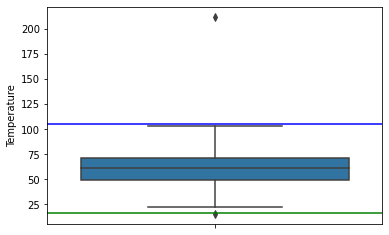

Rainfall:

Inner Lower Fence: 0.26 Inner Upper Fence: 1.3


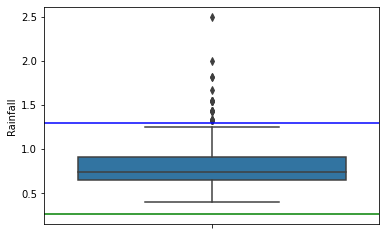

Flyers:

Inner Lower Fence: 4.0 Inner Upper Fence: 76.0


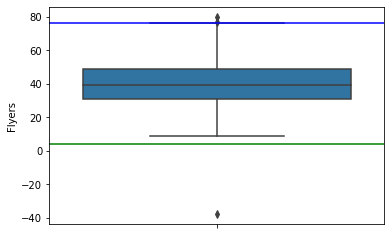

Price:

Inner Lower Fence: 0.5 Inner Upper Fence: 0.5


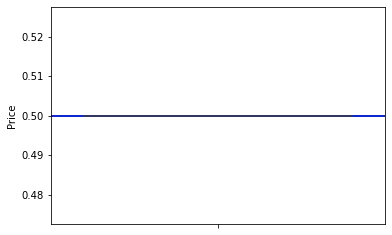

Sales:

Inner Lower Fence: 5.0 Inner Upper Fence: 45.0


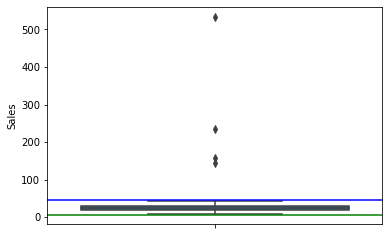

In [17]:
for col in list(df):
    if df[col].dtypes != 'O':
        ilf, iuf = get_lower_and_upper_bounds(df[col])
        print(f'{col}:\n\nInner Lower Fence: {ilf} Inner Upper Fence: {iuf}' )
        sns.boxplot(y = df[col])
        plt.axhline(ilf, c = 'g')
        plt.axhline(iuf, c = 'b')
        plt.show()

In [18]:
see_outlier_columns(df, df.Temperature)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21
2017-12-31,Sunday,15.1,2.50,9,0.5,7


In [19]:
see_outlier_columns(df, df.Rainfall)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-06,Friday,25.3,1.54,23,0.5,11
2017-01-07,Saturday,32.9,1.54,19,0.5,13
2017-01-11,Wednesday,32.6,1.54,23,0.5,12
2017-01-12,Thursday,38.2,1.33,16,0.5,14
2017-01-13,Friday,37.5,1.33,19,0.5,15
2017-01-16,Monday,30.6,1.67,24,0.5,12


In [20]:
see_outlier_columns(df, df.Flyers)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-06-16,Friday,99.3,0.47,77,0.5,41
2017-07-14,Friday,92.0,0.50,80,0.5,40
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20


In [21]:
see_outlier_columns(df, df.Price)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


In [22]:
see_outlier_columns(df, df.Sales)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143
2017-07-02,Sunday,93.4,0.51,68,0.5,158
2017-07-03,Monday,81.5,0.54,68,0.5,235
2017-07-04,Tuesday,84.2,0.59,49,0.5,534


##### Upper Outliers 1.5¶
1. Temp has one outlier, 212 is a typo. No way it was that hot. Drop that one
2. Rainfall has a lot of outliers. Will consider making the range wider before dropping outliers
3. Flyers has two outliers, seem reasonable. Very close to the rest of the data. can keep
4. Sales has 4 outliers, not close to the rest of the data. All over the 4th of July Holiday (was on a Tuesday that year), important holiday info perhaps

1.c. Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [23]:
def plot_outliers(df, multiplier = 1.5):
    '''
    This function takes in a dataframe, and a range multiplier
    Creates box plots for every numeric column
    Uses get_lower_and_upper_bounds function
    '''
    for col in list(df):
        if df[col].dtypes != 'O':
            ilf, iuf = get_lower_and_upper_bounds(df[col], multiplier = multiplier)
            print(f'{col}:\n\nInner Lower Fence: {ilf} Inner Upper Fence: {iuf}' )
            sns.boxplot(y = df[col], whis=multiplier)
            plt.axhline(ilf, c = 'green')
            plt.axhline(iuf, c = 'orange')
            plt.show()

Temperature:

Inner Lower Fence: -16.299999999999997 Inner Upper Fence: 137.7


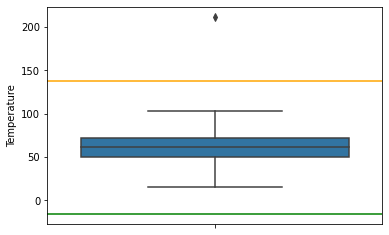

Rainfall:

Inner Lower Fence: -0.13 Inner Upper Fence: 1.69


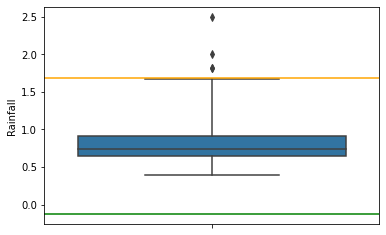

Flyers:

Inner Lower Fence: -23.0 Inner Upper Fence: 103.0


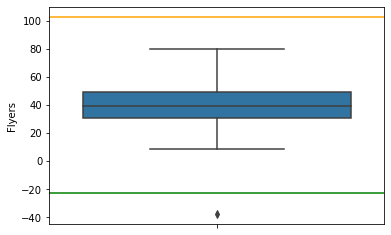

Price:

Inner Lower Fence: 0.5 Inner Upper Fence: 0.5


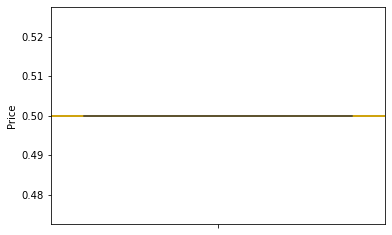

Sales:

Inner Lower Fence: -10.0 Inner Upper Fence: 60.0


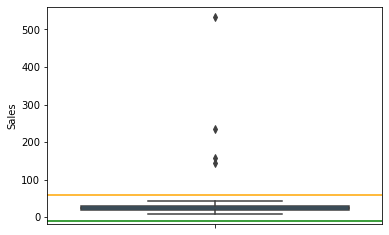

In [24]:
plot_outliers(df, multiplier=3)

In [25]:
see_outlier_columns(df, df.Temperature, upper_bound= False, multiplier=3)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


In [26]:
see_outlier_columns(df, df.Flyers, upper_bound=False, multiplier=3)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20


##### Lower Outliers 3
1. Temp doesn't have that fence sitter outlier it did before
2. Flyers still has that negative number of flyers which doesn't make sense. So that could be dropped

1.d. Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [27]:
see_outlier_columns(df, df.Temperature, upper_bound=True, multiplier=3)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21


In [28]:
see_outlier_columns(df, df.Rainfall,upper_bound=True, multiplier=3)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-12-05,Tuesday,22.0,1.82,11,0.5,10
2017-12-10,Sunday,31.3,1.82,15,0.5,11
2017-12-31,Sunday,15.1,2.50,9,0.5,7


In [29]:
see_outlier_columns(df, df.Flyers,upper_bound=True,  multiplier=3)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


In [30]:
see_outlier_columns(df, df.Price,upper_bound=True,  multiplier=3)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


In [31]:
see_outlier_columns(df, df.Sales,upper_bound=True,  multiplier=3)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143
2017-07-02,Sunday,93.4,0.51,68,0.5,158
2017-07-03,Monday,81.5,0.54,68,0.5,235
2017-07-04,Tuesday,84.2,0.59,49,0.5,534


##### Upper Outliers 3
1. Temperature has one outlier still that, what must be an, error of 212 degrees. Needs to go
2. Rainfall has much less than before. They could be dropped for ease but 2 inches of rain, while a lot, isn't totally out of the ordinary
3. No upper outliers for Flyers or Price
4. The same 4th of July outliers from when we had the multiplier set to 1.5 are here

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.

    - Do these make sense?
    - Should certain outliers be kept or removed?

In [32]:
def plot_box_and_dist(df, num_stds = 1, figsize = (18,3)):
    '''
    This function is for exploring. Takes in a dataframe with variables 
    you would like to see the box plot of.
    Input the dataframe (either fully, or using .drop)
    with ONLY the columns you want to see plotted.
    This function will do a check for 'object' type columns and not plot those
    It also plots the standard deviations above and below the mean, default is 1
    Optional argument figsize. Default it's small.    
    '''
    # use list comp to create distribution of all non object types
    col_list = [col for col in list(df) if df[col].dtypes != 'O']
    
    # loop through numeric columns and plot box plot and histogram
    for col in col_list:
        plt.figure(figsize=figsize)
        plt.subplot(121)
        sns.boxplot(x = col, data = df)
        plt.axvline(df[col].mean() + (df[col].std() * num_stds),
                  c = 'orange')
        plt.axvline(df[col].mean() - (df[col].std() * num_stds),
                  c = 'green')
        plt.title(f'Box Plot of {col}')

        plt.subplot(122)
        sns.histplot(data = df, x = col, kde=True)
        plt.axvline(df[col].mean() + (df[col].std() * num_stds),
                  c = 'orange')
        plt.axvline(df[col].mean() - (df[col].std() * num_stds),
                  c = 'green')
        plt.title(f'Distribution of {col}')
        plt.show()

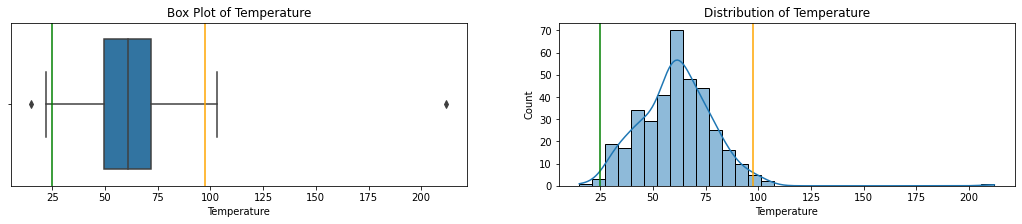

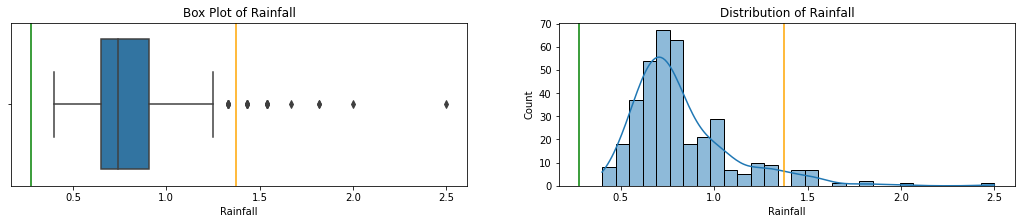

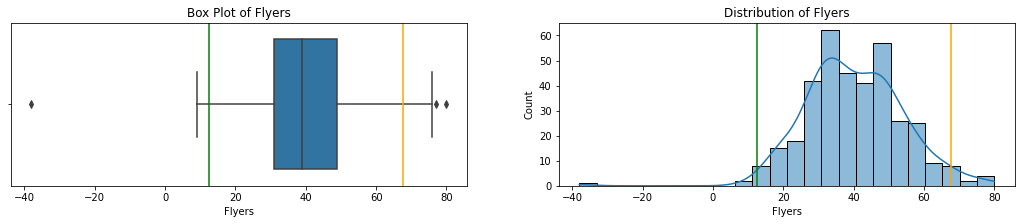

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


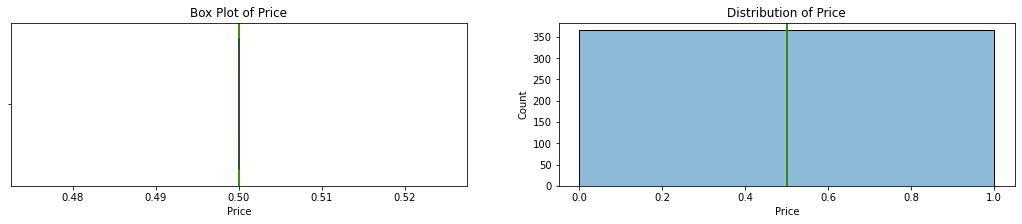

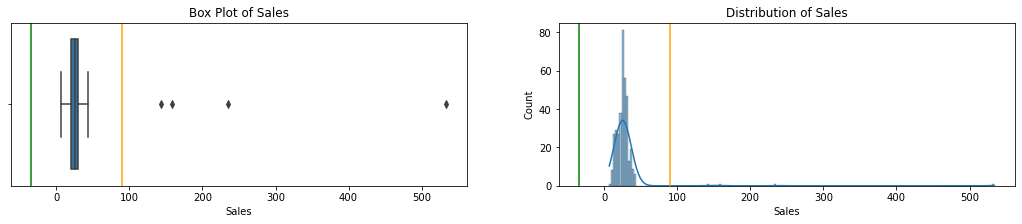

In [33]:
plot_box_and_dist(df, num_stds=2)

The following columns seem normally Distributed:
#### Temperature
- That high temp 212 needs to go. It would make the normal distribution a little better as well
#### Flyers
- That -38 needs to go as well. It's skewing the distribution to the left
#### Sales
- If sales had those high, at least the top one, but really all 4 dropped, the distribution would be almost normal
- But depending on what we're studying (need for supplies or product) I might keep those outliers. It would be good to have that info for predicting sales the next year on 4th of July.

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

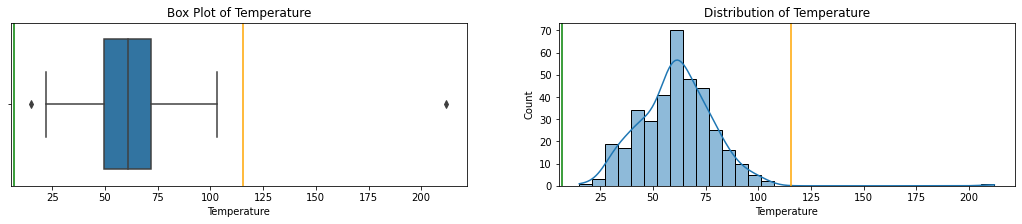

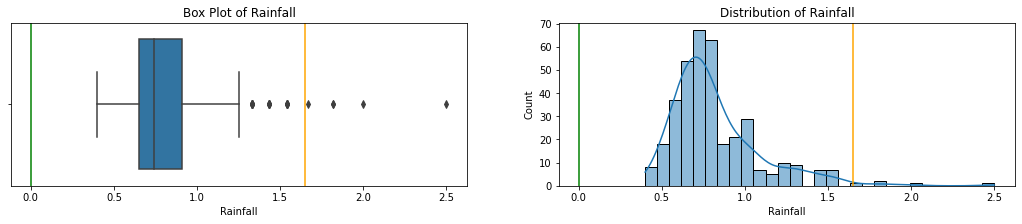

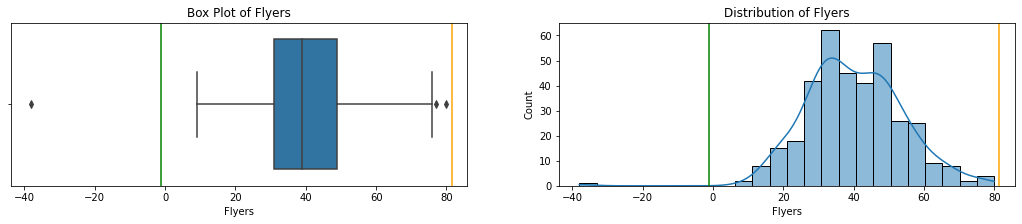

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


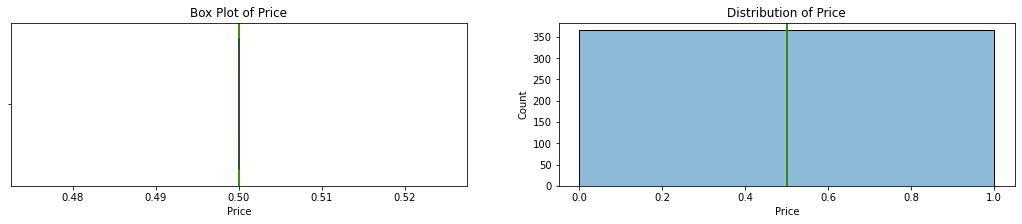

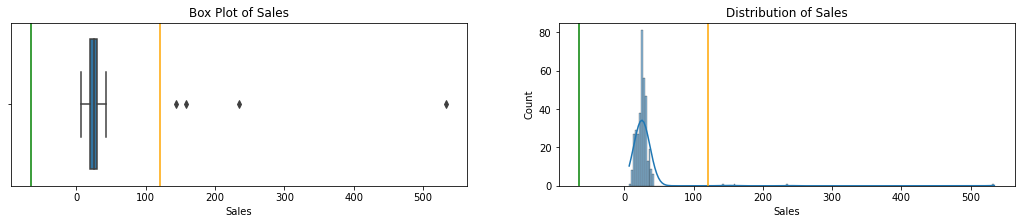

In [35]:
plot_box_and_dist(df, num_stds=3)

In [36]:

def see_outlier_columns_std(df, series, upper_bound = None, num_std = 2):
    '''
    This function takes in a dataframe and a seires
    Returns the upper or lower outliers in a dataframe based on standard deviations
    Boolean upper_bound automatically set to None (will give upper and lower bounds)
    Number of standard deviations is by default 2
    
    '''
    # if only want the upper bound
    if upper_bound == True:
        
        # calculate upper limit mean plus how many standard devs inputted
        upper_limit = series.mean() + (series.std() * num_std)
        
        return df[series > upper_limit]
    
    # if only want the lower bound
    if upper_bound == False:
        
        # calculate lower limit, mean - how many standard devs inputted
        lower_limit = series.mean() - (series.std() * num_std)
        
        return df[series < lower_limit] 
    
    # if non specified, return all outliers
    if upper_bound == None:
        
        upper_limit = series.mean() + (series.std() * num_std)
        
        lower_limit = series.mean() - (series.std() * num_std)
        
        return df[(series < lower_limit) | (series > upper_limit)]

In [37]:
see_outlier_columns_std(df, df['Flyers'], num_std=3)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20


In [38]:
see_outlier_columns_std(df, df['Temperature'], num_std=3)


,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21


In [39]:
see_outlier_columns_std(df, df['Rainfall'], num_std=3)


,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-16,Monday,30.6,1.67,24,0.5,12
2017-12-05,Tuesday,22.0,1.82,11,0.5,10
2017-12-10,Sunday,31.3,1.82,15,0.5,11
2017-12-31,Sunday,15.1,2.50,9,0.5,7


In [40]:
see_outlier_columns_std(df, df['Sales'], num_std=3)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143
2017-07-02,Sunday,93.4,0.51,68,0.5,158
2017-07-03,Monday,81.5,0.54,68,0.5,235
2017-07-04,Tuesday,84.2,0.59,49,0.5,534
